In [2]:
import pickle

In [6]:
with open('mccv_dict.pickle', 'rb') as handle:
    mccv_data = pickle.load(handle)

In [7]:
with open('mccv_permuted_dict.pickle', 'rb') as handle:
    mccv_permuted_data = pickle.load(handle)

In [12]:
import pandas as pd

In [15]:
ml_df = pd.concat([(mccv_data['Model Learning'].
                melt(id_vars = ['bootstrap','model']).
                eval('learning = "real"')
                ),(mccv_permuted_data['Model Learning'].
                melt(id_vars = ['bootstrap','model']).
                eval('learning = "permuted"')
                )])

In [17]:
from plotnine import *

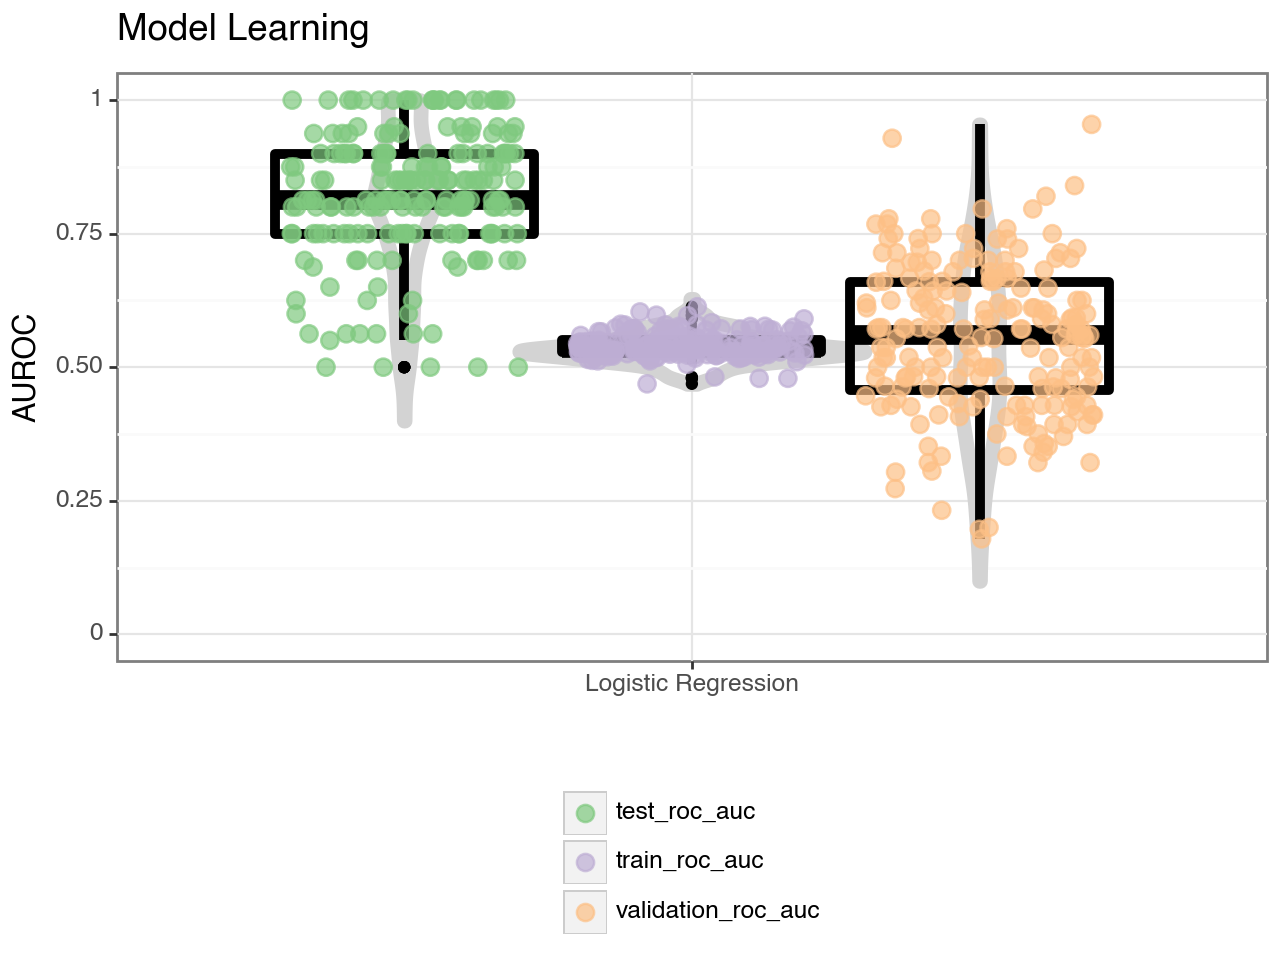

<Figure Size: (640 x 480)>

In [118]:
(ggplot(
       data=ml_df,
       mapping=aes(x='model',y='value',group='variable'))
+ geom_violin(
        position=position_dodge(width=0.75),
        color='lightgrey',
        size=3)
 + geom_boxplot(
        data=ml_df.query("learning=='real'"),
        color='black',
        size=2,
        alpha=0
        )
 + geom_point(
       data=ml_df.query("learning=='real'"),
       mapping=aes(color='variable'),
       position=position_jitterdodge(jitter_width=0.2),
       size=3,alpha=0.7)
 + scale_color_brewer(type='qual',palette=1) 
 + guides(color=guide_legend(title='',ncol=1))
 + scale_y_continuous(limits=[0,1]) 
 + theme_bw() 
 + theme(text=element_text(face='bold'),
         legend_position='bottom')
 + labs(**{'x': '','y': 'AUROC'},title='Model Learning')
)

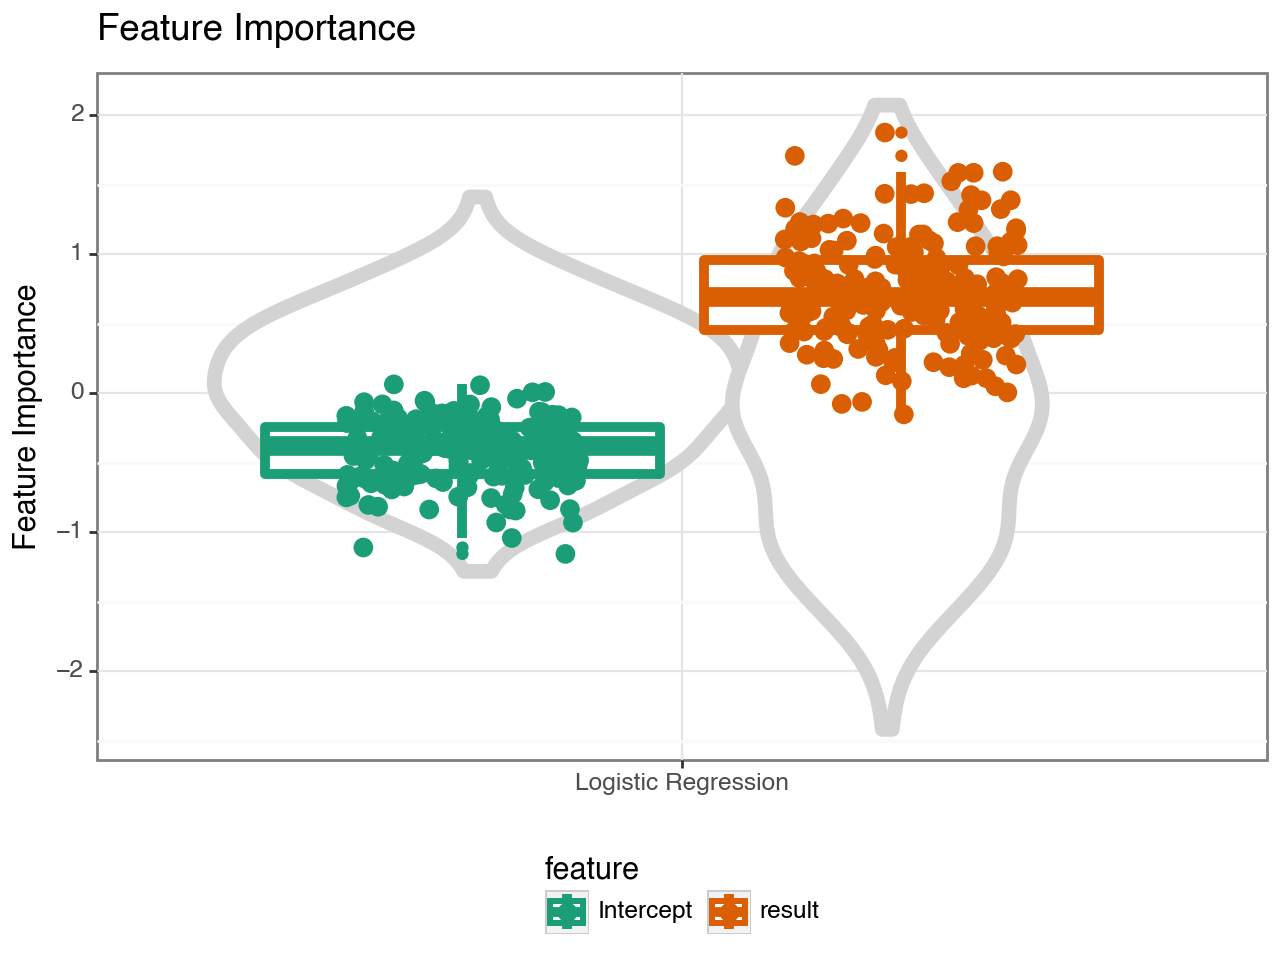

<Figure Size: (640 x 480)>

In [111]:
tmp = (mccv_data['Feature Importance'].
 set_index(['bootstrap','model','feature']).
 join(
     mccv_permuted_data['Feature Importance'].
     rename(columns={'importance' : 'permuted_importance'}).
     set_index(['bootstrap','model','feature'])
 ).
 reset_index()
 )
pos = position_dodge(width = 0.7)
(ggplot(tmp,aes(x='model',y='importance',color='feature'))
                + geom_violin(
                    mapping=aes(x='model',y='permuted_importance',
                                group='feature'),
                    position=position_dodge(width = .7),
                    color='lightgrey',
                    size=3)
                + geom_boxplot(size=2) 
                + geom_jitter(size=3,
                              position = position_jitterdodge(jitter_width = 0.2))
                + scale_color_brewer(type='qual',palette=2)
                + theme_bw()
                + theme(text=element_text(face='bold'),
                        legend_position='bottom')
                + labs(**{'x': '','y': 'Feature Importance'},
                       title='Feature Importance')
                )

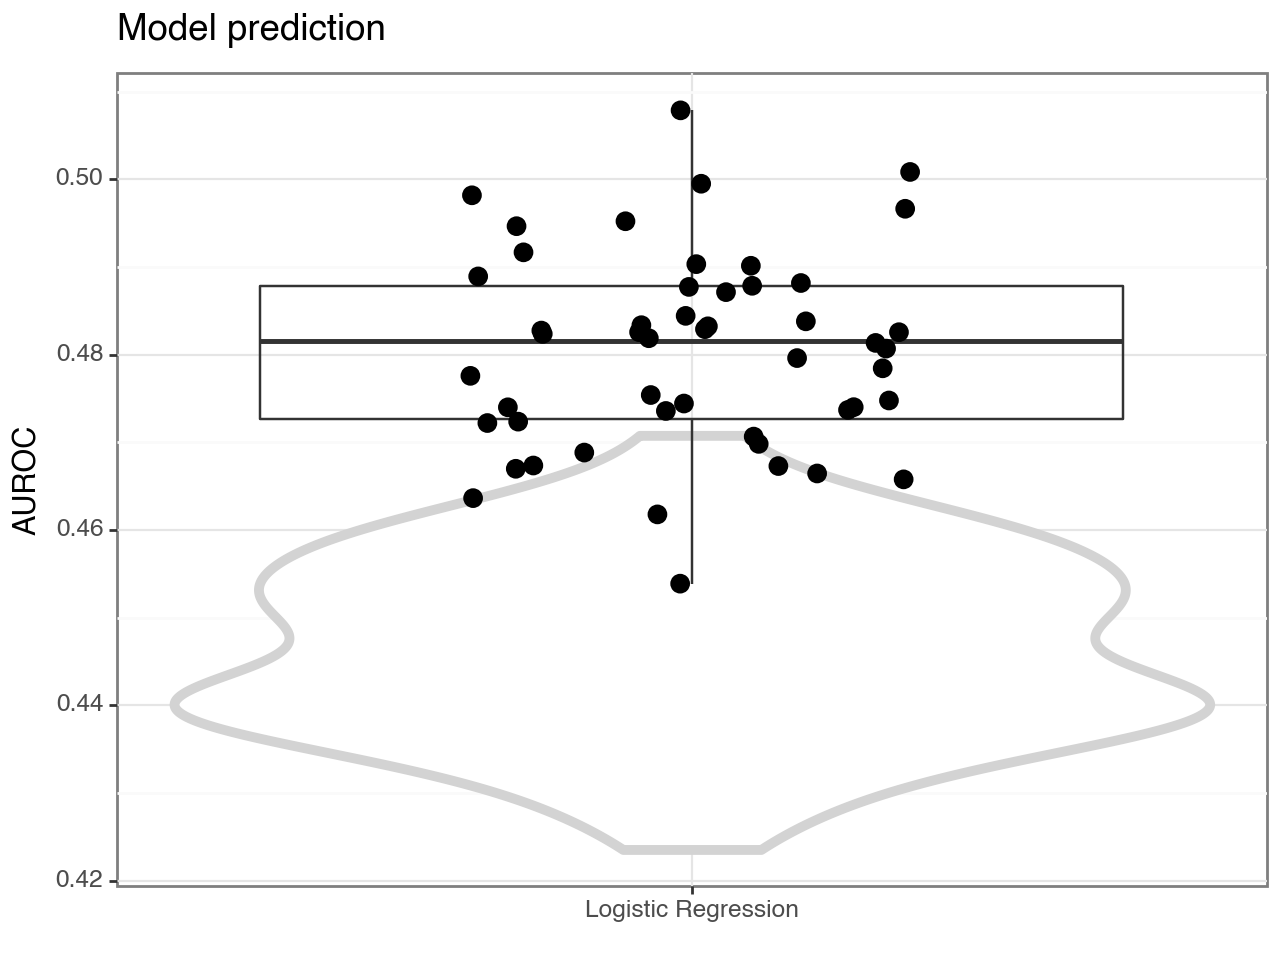

<Figure Size: (640 x 480)>

In [126]:
preds_df = (pd.concat([mccv_data['Performance'].eval('learning="real"'),mccv_permuted_data['Performance'].eval('learning="permuted"')]))
tmp = preds_df.copy()
(ggplot(tmp.query('learning=="real"'),aes(x='model',y='value'))
                + geom_violin(data=tmp.query('learning=="permuted"'),color="lightgrey",size=2)
                + geom_boxplot(alpha=0) 
                + geom_point(shape='o',size=3,position=position_jitter(width=0.2))
                + theme_bw()
                + theme(text=element_text(face='bold'),
                        legend_position='bottom')
                + labs(**{'x' : '','y' : 'AUROC'},
                    title="Model prediction",)
                )

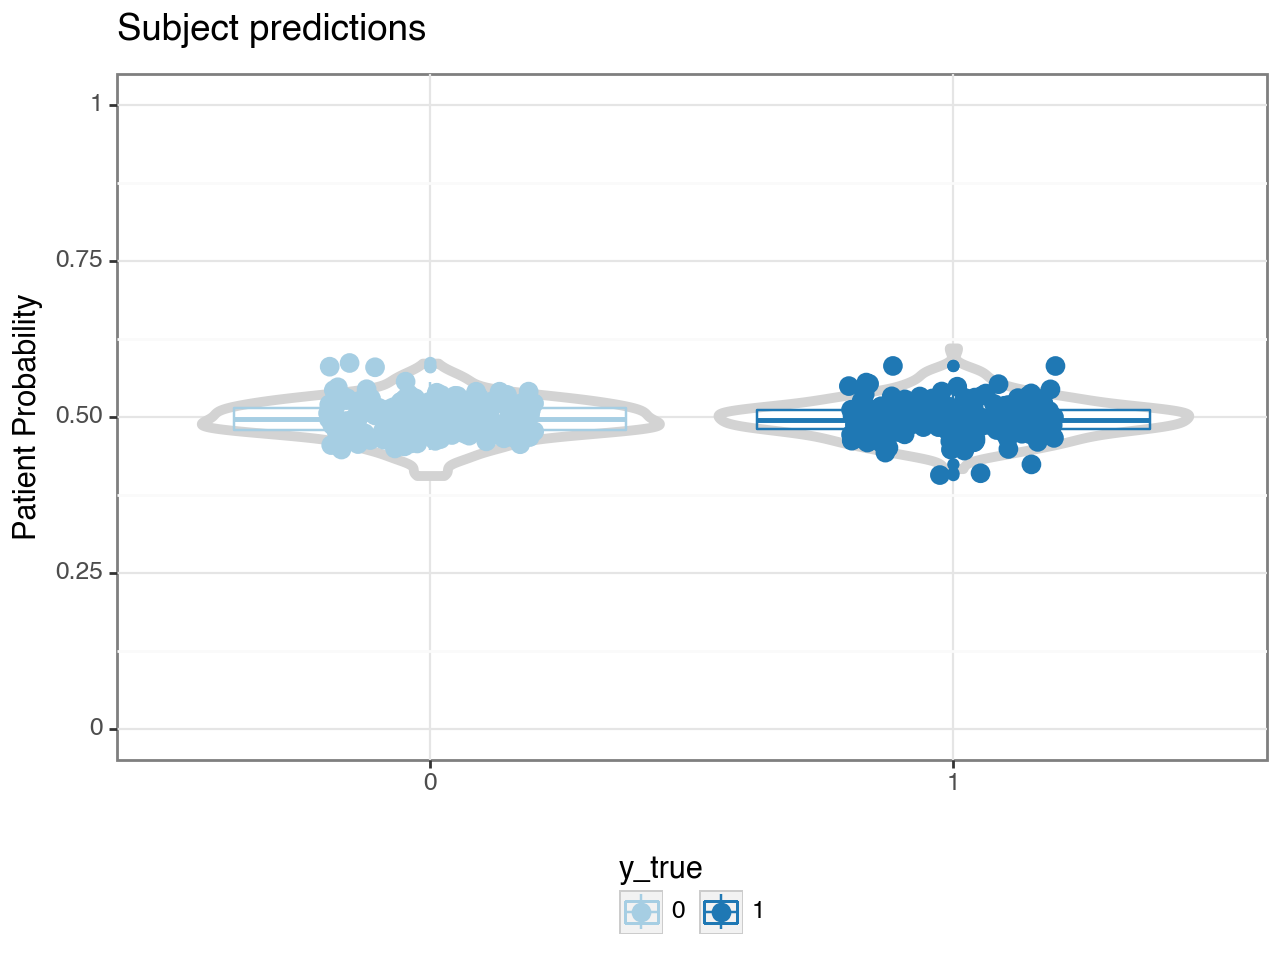

<Figure Size: (640 x 480)>

In [132]:
pt_preds_df = c
tmp = pt_preds_df.copy()
tmp['y_true'] = tmp['y_true'].astype('int').astype('object')
(ggplot(tmp.query('learning=="real"'),
        mapping=aes(x='y_true',y='y_proba',color='y_true'))
                + geom_violin(data=tmp.query('learning=="permuted"'),color="lightgrey",size=2)
                + geom_boxplot(alpha=0)
                + geom_point(shape='o',size=3,position=position_jitter(width=0.2))
                + scale_color_brewer(type='qual',palette=3)
                + scale_y_continuous(limits=[0,1])
                + theme_bw()
                + theme(text=element_text(face='bold'),
                        legend_position='bottom')
                + labs(**{'x' : '','y' : 'Patient Probability'},
                    title="Subject predictions")
                )